In [262]:
# Import libraries

import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [263]:
# Set random seed for reproducibility
# tf.random.set_seed(42)

In [125]:
# Define the custom preprocessing function to crop images to a square ratio
# Maintain the aspect ration when cropping
def crop_to_square2(image):
    print(image.size)
    min_side = min(image.size)
    left = (image.width - min_side) / 2
    top = (image.height - min_side) / 2
    right = (image.width + min_side) / 2
    bottom = (image.height + min_side) / 2
    image = image.crop((left, top, right, bottom))
    return image

# Crop a square from the center of the image
def crop_to_square(image):
    width, height = image.shape[1], image.shape[0]
    new_width = new_height = min(width, height)
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    # Crop the array by selecting a subset of rows and columns
    image = image[int(top):int(bottom), int(left):int(right)]
    return image

In [126]:
image_size = (178, 218)

In [127]:
data_dir = 'data'

In [128]:
# Get the list of files and labels
file_paths = []
labels = []

for class_label in os.listdir(data_dir):
    # Skip if file is not a directory
    if not os.path.isdir(os.path.join(data_dir, class_label)):
        continue
    class_path = os.path.join(data_dir, class_label)
    
    # Add only jpg files
    class_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.lower().endswith('.jpg')]
    
    # Set label based on class
    # if class_label == 'wearing_hat':
    #     class_label = 1
    # elif class_label == 'not_wearing_hat':
    #     class_label = 0
    # else:
    #     # Handle other classes if needed
    #     continue
    
    file_paths.extend(class_files)
    labels.extend([class_label] * len(class_files))

In [129]:
print(len(file_paths), len(labels))

1900 1900


In [130]:
print(labels[0:-5])

['wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_

In [131]:
# Split the data into training, validation, and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2)
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths, train_labels, test_size=0.25)

In [132]:
print(len(train_paths), len(train_labels))
print(len(val_paths), len(val_labels))

1140 1140
380 380


In [133]:
# Print 5 file paths and labels randomly
print(train_paths[0:5])
print(train_labels[0:5])

['data/not_wearing_hat/070400.jpg', 'data/not_wearing_hat/095999.jpg', 'data/wearing_hat/190897.jpg', 'data/not_wearing_hat/157889.jpg', 'data/wearing_hat/136878.jpg']
['not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat']


In [134]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_to_square)
val_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_to_square)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_to_square)

# Define batch size
batch_size = 32

In [135]:
# Define the training dataset using the training set paths and labels



In [136]:
print(type(pd.DataFrame({'filename': train_paths, 'class': train_labels})['filename']))

<class 'pandas.core.series.Series'>


In [137]:
train_labels = list(train_labels)

train_df = pd.DataFrame({'filename': train_paths, 'class': train_labels})
train_df['class'] = list(train_labels)
print(type(train_df['class']))

<class 'pandas.core.series.Series'>


In [138]:
# Training data generator
train_generator = train_datagen.flow_from_dataframe(pd.DataFrame({'filename': train_paths, 'class': train_labels}), 
                                                    target_size=(178, 178),
                                                    batch_size=batch_size, 
                                                    class_mode='binary'
                                                    )

# Validation data generator
val_generator = val_datagen.flow_from_dataframe(pd.DataFrame({'filename': val_paths, 'class': val_labels}), 
                                                target_size=(178, 178),
                                                batch_size=batch_size, 
                                                class_mode='binary' 
                                                )

# Test data generator
test_generator = test_datagen.flow_from_dataframe(pd.DataFrame({'filename': test_paths, 'class': test_labels}), 
                                                  target_size=(178, 178),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode=None
                                                 )

Found 1140 validated image filenames belonging to 2 classes.
Found 380 validated image filenames belonging to 2 classes.
Found 380 validated image filenames.


In [139]:
# Split the data into training and validation sets
# train_images, val_images, train_labels, val_labels = train_test_split(train_generator, train_generator.labels, test_size=0.2)


In [174]:
print(train_generator.filenames)

['data/not_wearing_hat/070400.jpg', 'data/not_wearing_hat/095999.jpg', 'data/wearing_hat/190897.jpg', 'data/not_wearing_hat/157889.jpg', 'data/wearing_hat/136878.jpg', 'data/not_wearing_hat/139091.jpg', 'data/wearing_hat/060350.jpg', 'data/wearing_hat/177429.jpg', 'data/wearing_hat/148607.jpg', 'data/wearing_hat/161501.jpg', 'data/wearing_hat/127330.jpg', 'data/wearing_hat/194192.jpg', 'data/wearing_hat/123918.jpg', 'data/wearing_hat/090785.jpg', 'data/not_wearing_hat/195124.jpg', 'data/not_wearing_hat/004816.jpg', 'data/wearing_hat/102450.jpg', 'data/not_wearing_hat/076450.jpg', 'data/not_wearing_hat/121067.jpg', 'data/not_wearing_hat/084916.jpg', 'data/wearing_hat/134844.jpg', 'data/not_wearing_hat/131854.jpg', 'data/not_wearing_hat/080362.jpg', 'data/not_wearing_hat/082834.jpg', 'data/wearing_hat/101962.jpg', 'data/wearing_hat/069846.jpg', 'data/not_wearing_hat/075067.jpg', 'data/not_wearing_hat/058087.jpg', 'data/not_wearing_hat/144968.jpg', 'data/not_wearing_hat/197933.jpg', 'data

In [249]:

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(178, 178, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer added
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer added
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout layer added
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer added
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 176, 176, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 88, 88, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 88, 88, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 43, 43, 64)       

In [261]:

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10


2023-09-30 13:34:56.439117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 1.2885 - accuracy: 0.4895

TypeError: 'NoneType' object is not callable

In [235]:

true_labels = test_labels
print(true_labels)

['wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing

In [236]:
# if true_labels == 'wearing_hat' then change it to 1
true_label_ints = [1 if x == 'wearing_hat' else 0 for x in true_labels]

print(true_label_ints)


[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 

In [175]:
print(test_generator.filenames)

['data/wearing_hat/032404.jpg', 'data/not_wearing_hat/160692.jpg', 'data/not_wearing_hat/134883.jpg', 'data/wearing_hat/199991.jpg', 'data/not_wearing_hat/193046.jpg', 'data/not_wearing_hat/134861.jpg', 'data/not_wearing_hat/072630.jpg', 'data/not_wearing_hat/183295.jpg', 'data/wearing_hat/149882.jpg', 'data/not_wearing_hat/146353.jpg', 'data/wearing_hat/007714.jpg', 'data/not_wearing_hat/088653.jpg', 'data/not_wearing_hat/101543.jpg', 'data/wearing_hat/152866.jpg', 'data/wearing_hat/074232.jpg', 'data/not_wearing_hat/036227.jpg', 'data/wearing_hat/017614.jpg', 'data/not_wearing_hat/137080.jpg', 'data/not_wearing_hat/082388.jpg', 'data/not_wearing_hat/174383.jpg', 'data/not_wearing_hat/187772.jpg', 'data/wearing_hat/112347.jpg', 'data/not_wearing_hat/120342.jpg', 'data/not_wearing_hat/103299.jpg', 'data/not_wearing_hat/058409.jpg', 'data/not_wearing_hat/190126.jpg', 'data/not_wearing_hat/156809.jpg', 'data/not_wearing_hat/197403.jpg', 'data/not_wearing_hat/184611.jpg', 'data/wearing_ha

In [179]:
print(train_generator.classes)

[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

In [250]:
test_generator.classes = true_label_ints
print(test_generator.classes)
print(test_generator.filenames)

[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 

In [255]:
test_generator.class_indices = {'not_wearing_hat': 0, 'wearing_hat': 1}

In [257]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

2023-09-30 13:30:51.447286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [239]:
# Make predictions
predictions = model.predict(test_generator)
print(predictions)


2023-09-30 13:26:01.834318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 42ms/step
[[9.99977589e-01]
 [1.02978460e-02]
 [9.67634190e-03]
 [9.77260888e-01]
 [5.67385554e-03]
 [2.98718270e-03]
 [1.59422066e-02]
 [1.18012048e-01]
 [9.11702335e-01]
 [1.32101290e-02]
 [9.58705485e-01]
 [1.59505289e-02]
 [2.17518350e-03]
 [9.99972939e-01]
 [7.50568986e-01]
 [9.89697874e-01]
 [9.99985933e-01]
 [2.64268275e-02]
 [5.08926690e-01]
 [9.61854681e-03]
 [1.25463549e-02]
 [9.93957043e-01]
 [9.30080377e-03]
 [4.29217797e-03]
 [2.15554424e-02]
 [5.45327626e-02]
 [8.83461311e-02]
 [1.65721122e-02]
 [1.87731996e-01]
 [1.00000000e+00]
 [9.98081207e-01]
 [9.99929070e-01]
 [6.65154262e-03]
 [9.99941111e-01]
 [5.40493131e-01]
 [9.99973655e-01]
 [9.99993801e-01]
 [1.67147174e-01]
 [1.19706482e-01]
 [7.99406171e-02]
 [9.99995828e-01]
 [2.06707120e-01]
 [1.31010404e-03]
 [8.82555604e-01]
 [8.54967628e-03]
 [9.99972463e-01]
 [1.47301622e-03]
 [4.52166528e-01]
 [2.81683821e-02]
 [9.99830127e-01]
 [9.93385851e-01]
 [9.99705970e-01]
 [2.454085

In [240]:
predicted_labels = np.round(predictions).flatten()  # Assuming a sigmoid activation in the output layer

In [241]:
print(true_labels)

['wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing

In [242]:
print(predicted_labels)

[1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.

In [243]:
predicted_labels = ['wearing_hat' if x == 1 else 'not_wearing_hat' for x in predicted_labels]

print(predicted_labels)

['wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', '

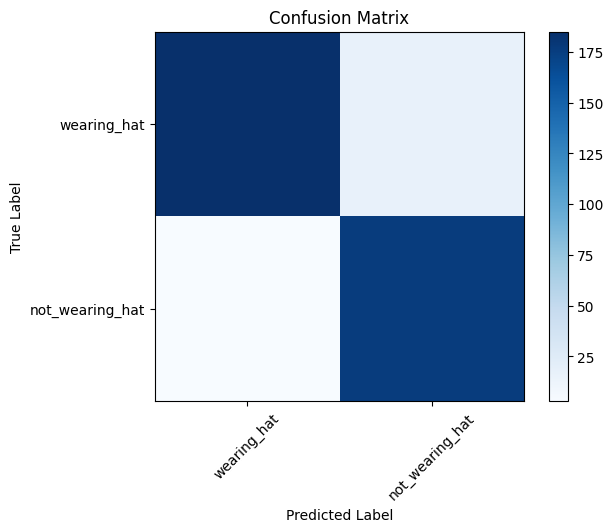

                 precision    recall  f1-score   support

not_wearing_hat       0.98      0.92      0.95       201
    wearing_hat       0.92      0.98      0.95       179

       accuracy                           0.95       380
      macro avg       0.95      0.95      0.95       380
   weighted avg       0.95      0.95      0.95       380



In [244]:
# Plot Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
# Define the class labels
class_labels = ["wearing_hat", "not_wearing_hat"]

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set custom axis labels
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels))

In [245]:
# Predict on a single image
# Load the image and resize it to the target size of 178 x 178 also crop it to a square
image = tf.keras.preprocessing.image.load_img('real_world/My3.jpeg')
image = crop_to_square2(image)

(1280, 1256)


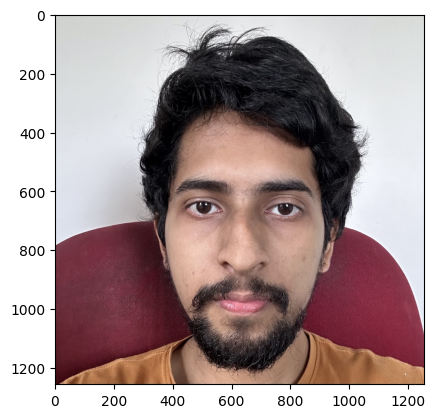

In [228]:
# Show the image using matplotlib
plt.imshow(image)

In [246]:

# Resize the image to the target size of 178 x 178
image = image.resize((178, 178))

# Convert the image to a numpy array
input_arr = tf.keras.preprocessing.image.img_to_array(image)

# Add another dimension (since Keras expects a list of images)
input_arr = np.array([input_arr])

# Make predictions
predictions = model.predict(input_arr)
print(predictions)

if predictions[0][0] == 1:
    print('The person is wearing a hat')
else:
    print('The person is not wearing a hat')

1/1 [==============================] - 0s 285ms/step
[[0.]]
The person is not wearing a hat


In [247]:
# Save model as h5 file
model.save('hat_classifier_2.h5')

/Users/sandulrenuja/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [260]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

KeyError: 'accuracy'